In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
display(df.head())
display(df.describe())
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Embarked', 'Fare']]
y = df.Survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
X.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Cabin       687
Embarked      2
Fare          0
dtype: int64

In [4]:
def null_to_bool(row):
    if type(row.Cabin) == str:
        row.Cabin = 1
    else:
        row.Cabin = 0
    return row

X = X.apply(null_to_bool, axis='columns')
X.Embarked = X.Embarked.fillna(df.Embarked.describe().top)
X.Age = X.Age.fillna(df.Age.mean())

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state = 1)
display(X_train)

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Fare
496,1,female,54.000000,1,0,1,C,78.2667
14,3,female,14.000000,0,0,0,S,7.8542
82,3,female,29.699118,0,0,0,Q,7.7875
657,3,female,32.000000,1,1,0,Q,15.5000
388,3,male,29.699118,0,0,0,Q,7.7292
...,...,...,...,...,...,...,...,...
715,3,male,19.000000,0,0,1,S,7.6500
767,3,female,30.500000,0,0,0,Q,7.7500
72,2,male,21.000000,0,0,0,S,73.5000
235,3,female,29.699118,0,0,0,S,7.5500


In [6]:
from sklearn.preprocessing import OneHotEncoder

ohencoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

categorical_features = ['Sex','Embarked']

OH_collumns_train = pd.DataFrame(ohencoder.fit_transform(X_train[categorical_features]))
OH_collumns_valid = pd.DataFrame(ohencoder.transform(X_valid[categorical_features]))

OH_collumns_train.index = X_train.index
OH_collumns_valid.index = X_valid.index


num_X_train = X_train.drop(categorical_features, axis=1)
num_X_valid = X_valid.drop(categorical_features, axis=1)

OH_X_train = pd.concat([num_X_train, OH_collumns_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_collumns_valid], axis=1)

In [7]:
display(OH_X_train)
display(OH_X_valid)
display(y_train)

,Pclass,Age,SibSp,Parch,Cabin,Fare,0,1,2,3,4
496,1,54.000000,1,0,1,78.2667,1.0,0.0,1.0,0.0,0.0
14,3,14.000000,0,0,0,7.8542,1.0,0.0,0.0,0.0,1.0
82,3,29.699118,0,0,0,7.7875,1.0,0.0,0.0,1.0,0.0
657,3,32.000000,1,1,0,15.5000,1.0,0.0,0.0,1.0,0.0
388,3,29.699118,0,0,0,7.7292,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
715,3,19.000000,0,0,1,7.6500,0.0,1.0,0.0,0.0,1.0
767,3,30.500000,0,0,0,7.7500,1.0,0.0,0.0,1.0,0.0
72,2,21.000000,0,0,0,73.5000,0.0,1.0,0.0,0.0,1.0
235,3,29.699118,0,0,0,7.5500,1.0,0.0,0.0,0.0,1.0


,Pclass,Age,SibSp,Parch,Cabin,Fare,0,1,2,3,4
862,1,48.000000,0,0,1,25.9292,1.0,0.0,0.0,0.0,1.0
223,3,29.699118,0,0,0,7.8958,0.0,1.0,0.0,0.0,1.0
84,2,17.000000,0,0,0,10.5000,1.0,0.0,0.0,0.0,1.0
680,3,29.699118,0,0,0,8.1375,1.0,0.0,0.0,1.0,0.0
535,2,7.000000,0,2,0,26.2500,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
824,3,2.000000,4,1,0,39.6875,0.0,1.0,0.0,0.0,1.0
408,3,21.000000,0,0,0,7.7750,0.0,1.0,0.0,0.0,1.0
678,3,43.000000,1,6,0,46.9000,1.0,0.0,0.0,0.0,1.0
688,3,18.000000,0,0,0,7.7958,0.0,1.0,0.0,0.0,1.0


496    1
14     0
82     1
657    0
388    0
      ..
715    0
767    0
72     0
235    0
37     0
Name: Survived, Length: 596, dtype: int64

<AxesSubplot:>

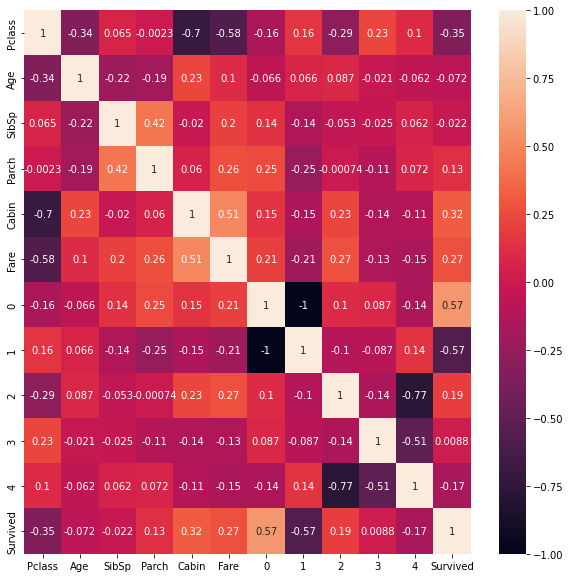

In [8]:
import matplotlib.pyplot as plt
import seaborn as sb

test = pd.concat([OH_X_train, pd.DataFrame(y_train)], axis=1)
plt.figure(figsize=(10, 10))
sb.heatmap(test.corr(), annot=True)

In [9]:
from sklearn import preprocessing

df = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
display(df.head())
display(df.describe())
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Embarked', 'Fare']]
Xt = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Embarked', 'Fare']]
y = df.Survived


def null_to_bool(row):
    if type(row.Cabin) == str:
        row.Cabin = 1
    else:
        row.Cabin = 0
    return row

X = X.apply(null_to_bool, axis='columns')
Xt = Xt.apply(null_to_bool, axis='columns')

X.Embarked = X.Embarked.fillna(df.Embarked.describe().top)
Xt.Embarked = Xt.Embarked.fillna(df.Embarked.describe().top)

X_normalizer = pd.concat([Xt['Age'], Xt['Age']])

X.Age = X.Age.fillna(X_normalizer.mean())
Xt.Age = Xt.Age.fillna(X_normalizer.mean())

X_normalizer = X_normalizer.fillna(X_normalizer.mean())

normalizer = preprocessing.MinMaxScaler()
normalizer.fit(X_normalizer.to_numpy().reshape(-1, 1))
X['Age'] = normalizer.transform(X['Age'].to_numpy().reshape(-1, 1))
Xt['Age'] = normalizer.transform(Xt['Age'].to_numpy().reshape(-1, 1))
# print(max(preprocessing.normalize(X['Age'].to_numpy().reshape(1, -1))))

Xt.Fare = Xt.Fare.fillna(df_test.Fare.mean())

print('Pós normalização')
display(X)

ohencoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

categorical_features = ['Sex','Embarked']

OH_collumns_train = pd.DataFrame(ohencoder.fit_transform(X[categorical_features]))
OH_collumns_test = pd.DataFrame(ohencoder.transform(Xt[categorical_features]))

OH_collumns_train.index = X.index
OH_collumns_test.index = Xt.index


num_X_train = X.drop(categorical_features, axis=1)
num_X_test = Xt.drop(categorical_features, axis=1)

OH_X_train = pd.concat([num_X_train, OH_collumns_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_collumns_test], axis=1)
display(OH_X_train)
X['Age'].describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Pós normalização


,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Fare
0,3,male,0.287881,1,0,0,S,7.2500
1,1,female,0.498879,1,0,1,C,71.2833
2,3,female,0.340630,0,0,0,S,7.9250
3,1,female,0.459317,1,0,1,S,53.1000
4,3,male,0.459317,0,0,0,S,8.0500
...,...,...,...,...,...,...,...,...
886,2,male,0.353818,0,0,0,S,13.0000
887,1,female,0.248319,0,0,1,S,30.0000
888,3,female,0.396975,1,2,0,S,23.4500
889,1,male,0.340630,0,0,1,C,30.0000


,Pclass,Age,SibSp,Parch,Cabin,Fare,0,1,2,3,4
0,3,0.287881,1,0,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,0.498879,1,0,1,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,0.340630,0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,0.459317,1,0,1,53.1000,1.0,0.0,0.0,0.0,1.0
4,3,0.459317,0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0.353818,0,0,0,13.0000,0.0,1.0,0.0,0.0,1.0
887,1,0.248319,0,0,1,30.0000,1.0,0.0,0.0,0.0,1.0
888,3,0.396975,1,2,0,23.4500,1.0,0.0,0.0,0.0,1.0
889,1,0.340630,0,0,1,30.0000,0.0,1.0,1.0,0.0,0.0


count    891.000000
mean       0.390914
std        0.171489
min        0.003297
25%        0.287881
50%        0.396975
75%        0.459317
max        1.052750
Name: Age, dtype: float64

In [10]:
y.dtypes

dtype('int64')

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.svm import SVC

def test_models(xtrain, ytrain):
    model1 = RandomForestClassifier(random_state=1)
    model2 = LogisticRegression(random_state= 1, max_iter= 1000)
    model3 = SVC(random_state=1)
    model4 = xgb.XGBClassifier(booster= 'dart', max_depth = 5, random_state = 0,verbosity= 0, eta=0.1)
    models = [model1, model2, model3, model4]
    models_ac = dict()
    for model in models:
        models_ac[model] = (cross_val_score(model, xtrain, ytrain, cv=5).mean())
        
    return models_ac


display(OH_X_train)
models_results = test_models(OH_X_train, y)
model = max(models_results, key = models_results.get)
model

test_models(OH_X_train, y)

        

,Pclass,Age,SibSp,Parch,Cabin,Fare,0,1,2,3,4
0,3,0.287881,1,0,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,0.498879,1,0,1,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,0.340630,0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,0.459317,1,0,1,53.1000,1.0,0.0,0.0,0.0,1.0
4,3,0.459317,0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0.353818,0,0,0,13.0000,0.0,1.0,0.0,0.0,1.0
887,1,0.248319,0,0,1,30.0000,1.0,0.0,0.0,0.0,1.0
888,3,0.396975,1,2,0,23.4500,1.0,0.0,0.0,0.0,1.0
889,1,0.340630,0,0,1,30.0000,0.0,1.0,1.0,0.0,0.0


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{RandomForestClassifier(random_state=1): 0.8047454648170234,
 LogisticRegression(max_iter=1000, random_state=1): 0.7901198920343984,
 SVC(random_state=1): 0.6701337015880988,
 XGBClassifier(base_score=None, booster='dart', colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None,
               enable_categorical=False, eta=0.1, gamma=None, gpu_id=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=5,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=0, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
               validate_parameters=None, verbosity=0): 0.8327976900382901}

In [12]:

df = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
display(df.head())
display(df.describe())
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Embarked', 'Fare']]
Xt = df_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Embarked', 'Fare']]
y = df.Survived


def null_to_bool(row):
    if type(row.Cabin) == str:
        row.Cabin = 1
    else:
        row.Cabin = 0
    return row

X = X.apply(null_to_bool, axis='columns')
Xt = Xt.apply(null_to_bool, axis='columns')

X.Embarked = X.Embarked.fillna(df.Embarked.describe().top)
Xt.Embarked = Xt.Embarked.fillna(df.Embarked.describe().top)

X.Age = X.Age.fillna(df.Age.mean())
Xt.Age = Xt.Age.fillna(df_test.Age.mean())

Xt.Fare = Xt.Fare.fillna(df_test.Fare.mean())

ohencoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

categorical_features = ['Sex','Embarked']

OH_collumns_train = pd.DataFrame(ohencoder.fit_transform(X[categorical_features]))
OH_collumns_test = pd.DataFrame(ohencoder.transform(Xt[categorical_features]))

OH_collumns_train.index = X.index
OH_collumns_test.index = Xt.index


num_X_train = X.drop(categorical_features, axis=1)
num_X_test = Xt.drop(categorical_features, axis=1)

OH_X_train = pd.concat([num_X_train, OH_collumns_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_collumns_test], axis=1)

display(OH_X_test.isnull().any())

model.fit(OH_X_train, y)
preds = model.predict(OH_X_test)
output = pd.DataFrame({'PassengerId': df_test.PassengerId,
                       'Survived': preds})

display(model)

output.to_csv('titanic_RF_submission.csv', index=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Pclass    False
Age       False
SibSp     False
Parch     False
Cabin     False
Fare      False
0         False
1         False
2         False
3         False
4         False
dtype: bool

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [13]:
display(model)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)